# Training a u-net on the Deepsense6G Dataset with mmSegmentation

## Create New Dataset

In [18]:
import mmcv
import mmengine

import numpy as np
import os
import matplotlib.pyplot as plt

data_root = "/data/DeepSense6G/stationary_scenarios/scenario31/generated_dataset"
file_name = "frame"

img_dir = "radar"
ann_dir = "lidar"

classes = ('lidar_point','no_point')
palette = [[1],[0]]


In [19]:
#obtaining the data

sample_idx = 1

#load the radar data
radar_file_path = os.path.join(data_root,img_dir,"{}_{}.npy".format(file_name,sample_idx))

radar_data = np.load(radar_file_path)

#load the lidar data
lidar_file_path = os.path.join(data_root,ann_dir,"{}_{}.npy".format(file_name,sample_idx))
lidar_data = np.load(lidar_file_path)

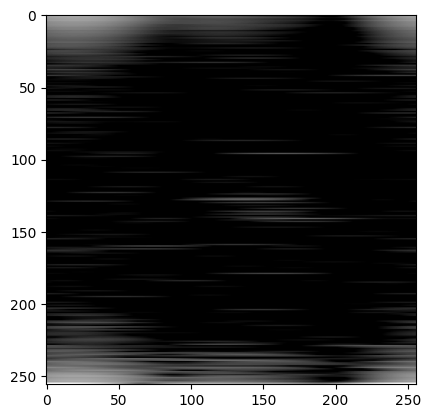

In [20]:
#show radar data
#visualize the radar data
fig,ax = plt.subplots()
ax.imshow(np.flip(radar_data[:,:,0]),cmap='gray') #show only the first chirp

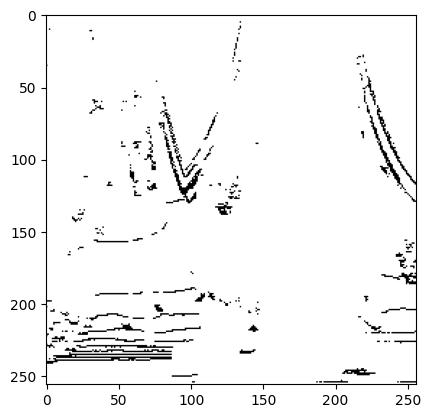

In [21]:
#show lidar data
#visualize the lidar data
fig,ax = plt.subplots()
ax.imshow(lidar_data,cmap='binary')

In [22]:
import os.path as osp
# split train/val set randomly
split_dir = 'splits'

#create 'splits' directory in data directory if it doesn't already exist
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))

#get a list of all of the file names with .png at the end
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.npy')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [23]:
#create a new dataset
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

@DATASETS.register_module()
class StanfordBackgroundDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', **kwargs)

## Create Configuration File

In [ ]:
from mmengine import Config